In [2]:
!pip install matplotlib 


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install tensorflow 


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install pandoc


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.7.4
cffi                      1.16.0
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.2
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.0.1
fastjsonschema            2.20.0
flatbuffers               24.3.25
fonttools                 4.53.1
fqdn                      1.5.1
gast                      0.6.0
google-pasta   


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')

**Tensorflow Input Pipepline**
Hard disk stores dataset of images that are then loaded into the devices Random Access memory (RAM). However, when influxed with millions of immages of data that that RAM is unable to hangle, a batch approach works. 
For example, if you have a dataset with 10 million images, you can adopt this **streaming approach**, where you can load images in batches of 1000. 
These images are loaded into a special data structure known as tf.data.Dataset, which allows you to build you tensorflow data pipeline. 
Requires tf.data API, and tf.data.Dataset is the main class in framework. 
Has many useful customizable functions: tf_dataset.filter(filter_func) and  tf_dataset = tf_dataset.map(lambda x: x/255) (to scale the images). 

This can all be reduced to a single line of code!
tf_dataset = tf.data.dataset.list_files('images/*').map(process_img).filter(filter_func).map(lambda x: x/255) 
tf.data input pipeline procedure: Extract, Transform, Load:ETL 

In [7]:
IMAGE_SIZE = 256
BATCH_SIZE = 64
CHANNELS = 3
EPOCHS=50

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "grape_dataset",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE), 
    batch_size = BATCH_SIZE 
)

Found 9027 files belonging to 4 classes.


In [9]:
split_class_names = dataset.class_names
list_of_classes = ['Black Rot', 'ESCA', 'Leaf Blight', 'Healthy']
split_class_names

['api', 'saved_models', 'test', 'train']

In [10]:
len(dataset)

142

(64, 256, 256, 3)
[3 3 3 3 2 3 3 3 3 3 3 3 3 3 2 3 2 3 3 3 3 3 3 2 3 3 3 2 2 2 3 2 2 3 3 3 3
 2 3 2 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 3 3 3 2]


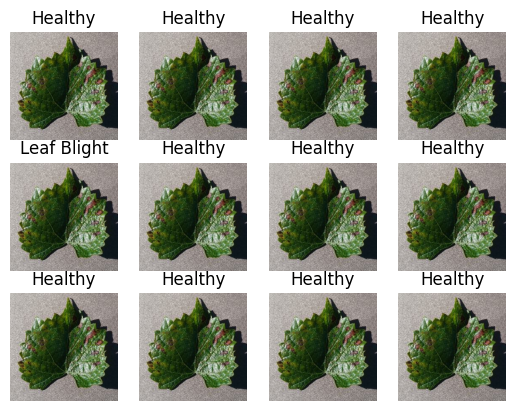

In [11]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    for i in range(12): 
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(list_of_classes[label_batch[i]])
        plt.axis("off")

80% ==> training 
20% ==> 10% validation, 10% test
prefetch and cache allows Read-CPU and Train-GPU to occur simultaneously, significantly lowering time: tf.data.Dataset.prefetch(1)

In [12]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.models import Sequential

In [14]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\JN\grape_dataset\train",
    batch_size = BATCH_SIZE,
    shuffle = True)

Found 7222 files belonging to 4 classes.


In [15]:
test_gen = tf.keras.preprocessing.image_dataset_from_directory(r"C:\JN\grape_dataset\test")

test_batches = tf.data.experimental.cardinality(test_gen)
val_ds = test_gen.take(test_batches // 2)
test_ds = test_gen.skip(test_batches // 2)

Found 1805 files belonging to 4 classes.


In [16]:
len(train_ds)

113

In [17]:
len(val_ds)

28

In [18]:
len(test_ds)

29

In order to ensure your model is robust and can handle images that have distinct contrast, zoom, or rotations, we will utilize the concept of **data augmentation** and implement some **preprocessing**

In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE), 
    layers.Rescaling(1.0/255)
])

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

Convolutional Neural Network Architecture
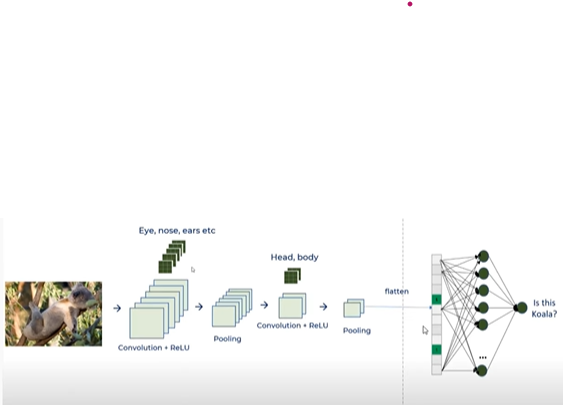

In [21]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale, 
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'), 
    layers.Dense(n_classes, activation='softmax'), 
])

model.build(input_shape=input_shape)

C:\Users\prish\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (64, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (64, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (64, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (64, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (64, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (64, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (64, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (64, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (64, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (64, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (64, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (64, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (64, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (64, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (64, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (64, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (64, 4)                     │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
steps_per_epoch = 30 

history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
    steps_per_epoch=steps_per_epoch
)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6239 - loss: 0.8643 - val_accuracy: 0.6261 - val_loss: 1.0898
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.7254 - loss: 0.6850 - val_accuracy: 0.6440 - val_loss: 1.1489
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.7425 - loss: 0.6289 - val_accuracy: 0.6864 - val_loss: 0.9858
Epoch 4/50
23/30 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7989 - loss: 0.5558

C:\Users\prish\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


30/30 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8007 - loss: 0.5492 - val_accuracy: 0.7087 - val_loss: 0.9586
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.7734 - loss: 0.5592 - val_accuracy: 0.7634 - val_loss: 0.5458
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.7049 - loss: 0.6324 - val_accuracy: 0.7411 - val_loss: 0.6657
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.8185 - loss: 0.4737 - val_accuracy: 0.6998 - val_loss: 0.7738
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8171 - loss: 0.4639 - val_accuracy: 0.7511 - val_loss: 0.6463
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.8829 - loss: 0.3296 - val_accuracy: 0.8460 - val_loss: 0.4457
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.8979 - loss: 0.2805 - val_accuracy: 0.8158 - val_loss: 0.5251
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.9134 - loss: 0.2438 - val_accuracy: 0.8192 - val_loss: 0.5309
E

In [30]:
scores = model.evaluate(test_ds)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.9890 - loss: 0.0319


In [31]:
scores

[0.035467807203531265, 0.9856985807418823]

In [32]:
history.params
history.history.keys()
history.history['accuracy']

[0.6473958492279053,
 0.7354166507720947,
 0.7583333253860474,
 0.8064295649528503,
 0.762499988079071,
 0.7421875,
 0.8348958492279053,
 0.8331053256988525,
 0.8776041865348816,
 0.8947916626930237,
 0.8973958492279053,
 0.8823529481887817,
 0.9088541865348816,
 0.9390624761581421,
 0.9276041388511658,
 0.928864598274231,
 0.948437511920929,
 0.9354166388511658,
 0.9557291865348816,
 0.9610123038291931,
 0.9614583253860474,
 0.9333333373069763,
 0.9416666626930237,
 0.8577291369438171,
 0.8921874761581421,
 0.9317708611488342,
 0.96875,
 0.9480164051055908,
 0.9468749761581421,
 0.9645833373069763,
 0.9744791388511658,
 0.9630643129348755,
 0.9572916626930237,
 0.96875,
 0.9786458611488342,
 0.9781121611595154,
 0.9708333611488342,
 0.979687511920929,
 0.9760416746139526,
 0.9815321564674377,
 0.9682291746139526,
 0.9583333134651184,
 0.9848958253860474,
 0.9829001426696777,
 0.9770833253860474,
 0.9833333492279053,
 0.9901041388511658,
 0.9822161197662354,
 0.9723958373069763,
 0.979

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

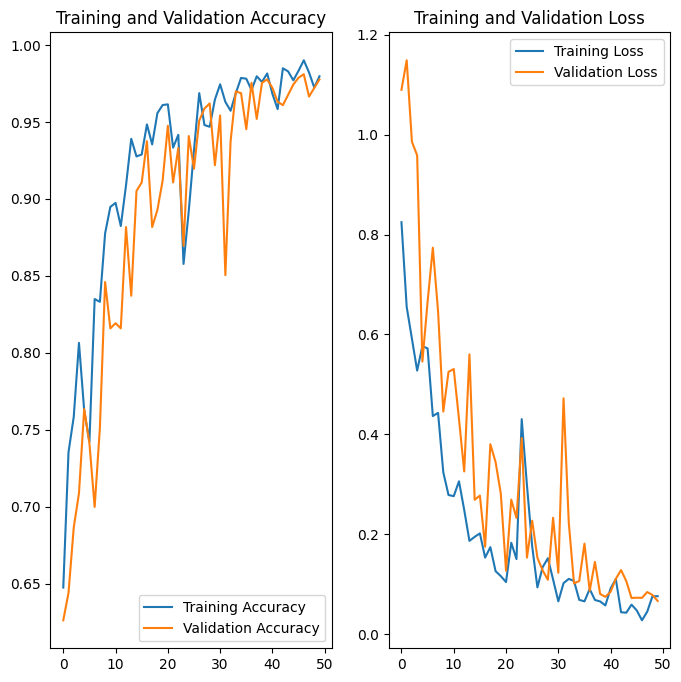

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy') 
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#loss is essentially the error in backwards propogation
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss') 
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

image to predict
image's actual label:  Black Rot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
image's predicted label:  Black Rot


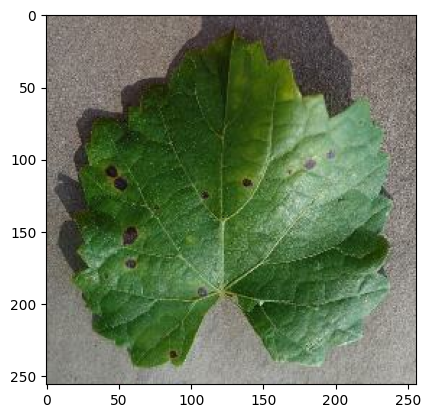

In [35]:
 import numpy as np

 for images_batch, labels_batch in test_ds.take(1):
     
     first_image = images_batch[0].numpy().astype('uint8')
     first_label = labels_batch[0].numpy()
     
     print("image to predict")
     plt.imshow(first_image)
     print("image's actual label: ", list_of_classes[first_label])

     batch_prediction = model.predict(images_batch)
     print("image's predicted label: ", list_of_classes[np.argmax(batch_prediction[0])])

In [36]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) #Create a batch 

    predictions = model.predict(img_array)

    predicted_class = list_of_classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


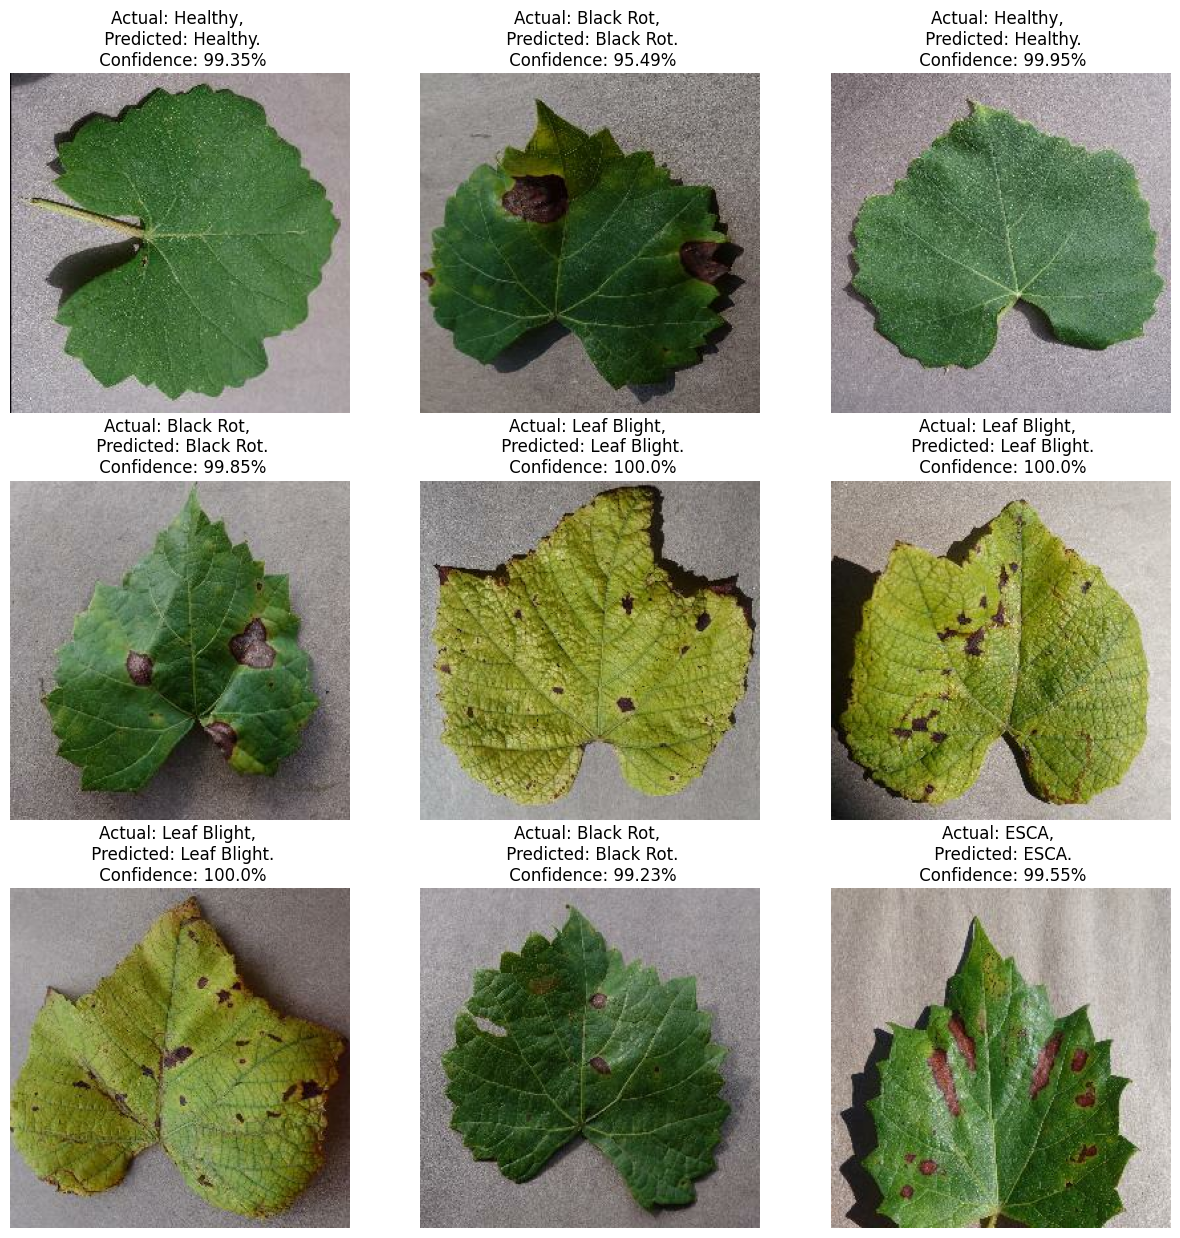

In [40]:
plt.figure(figsize=(15,15))

for images, label in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3 ,i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = list_of_classes[label[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [66]:
import os 

model_version = "1"
save_path = "C:\JN\grape_dataset\saved_models.keras"
model.save("model_1.keras")

<>:4: SyntaxWarning: invalid escape sequence '\J'
<>:4: SyntaxWarning: invalid escape sequence '\J'
C:\Users\prish\AppData\Local\Temp\ipykernel_5108\642678422.py:4: SyntaxWarning: invalid escape sequence '\J'
  save_path = "C:\JN\grape_dataset\saved_models.keras"


**TF Serving**

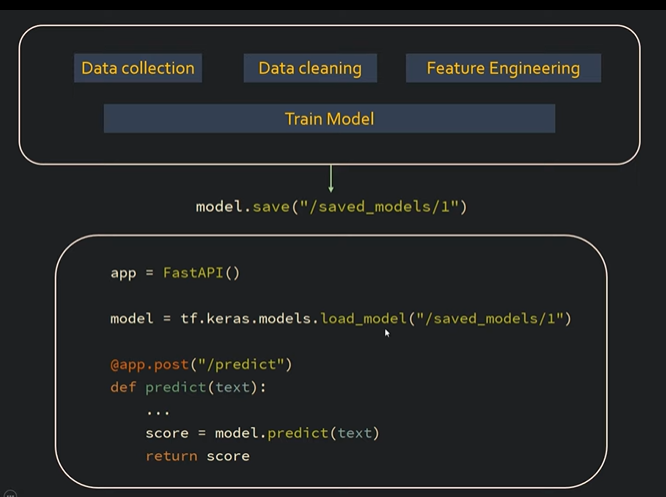

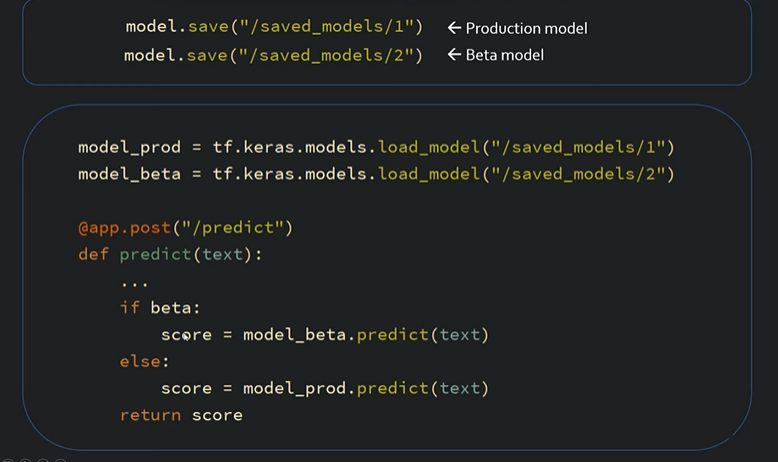

The images show how version management become tedious, with multiple switch cases. TF Serving makes model version management and model serving very easy. 
In Windows Powershell type the following commands: 
//Maps from directory in host to docker
//8605 on host system is mapped to 8605 in docker image container

>> docker run -it -v directory_name:/tf_serving -p 8605:8605 --entrypoints /bin/bash tensorflow/serving 
>> tensorflow_model_server --rest_api_port-8605 --model_name=email_model --model_base_path=/tf_serving

**FAST API**
UI --> Backend (in node.js, Flask, FAST API)

pip install fastapi

pip install uvicorn 


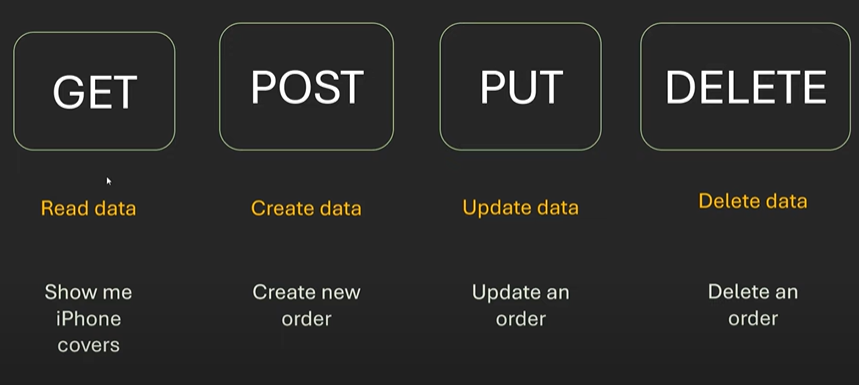

FastAPI is a modern, high-performance web framework for building APIs with Python. 
HTTP Methods: REST APIs use standard HTTP methods (GET, POST, PUT, DELETE) for communication.

**React Functional Component** 
They are just javascript functions, that has properties as an input and returns Javascript XML that describes the UI.

After creating a component, export default ComponentGreet, you can import using any name because of the keyword default. 
However, with the following line of code, you must import it with the same name ("a named export"). 



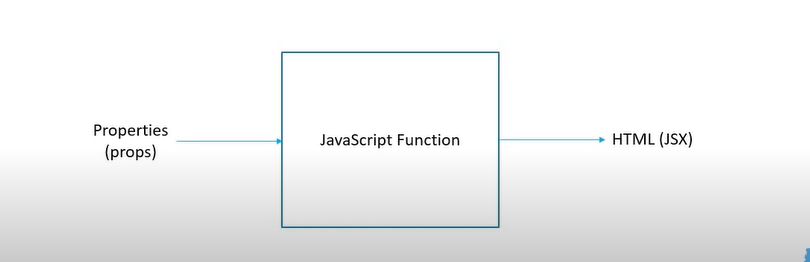



React useState Hook (this is what allows us to drag and drop, and receive images in the web application)

React Hook "useState" cannot be called conditionally. It must be called in the exact same order in any component render. 

They let you access state and other React features directly from functional components. With hooks, you can write more concise and expressive code without relying on class components

Simple Example that Implements useState

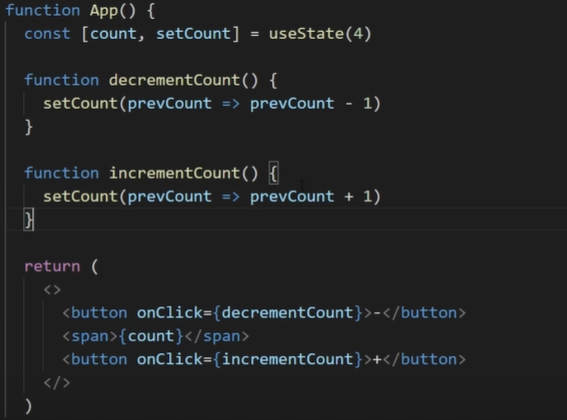



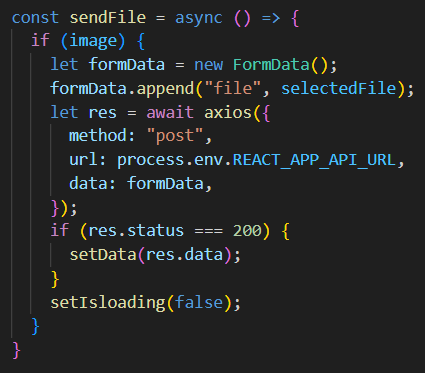